In [1]:
#Set seed
import numpy as np
np.random.seed(31415)

In [2]:
import os
from sklearn.manifold import TSNE
from sklearn.decomposition import IncrementalPCA as IPCA
import random

from matplotlib import pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import seaborn as sns
import pandas as pd

import torch

In [3]:
def load_subset(path, spks_to_keep):
    X = []
    labels = []
    
    
    df = pd.read_csv(path)
    idx_to_keep = df['spk_id'].isin(spks_to_keep)
    
    
    for idx, row in df[idx_to_keep].iterrows():
        path = row['_path']
        spk = row['spk_id']
        th_embd = torch.load(path)
        X.append(th_embd.numpy())
        labels.append(spk)
    return np.concatenate(X), labels

In [4]:
path_embd_test = '/cas/DeepLearn/elperu/tmp/speech_datasets/LibriSpeech/embeddings_10/test_samples.csv'
path_embd_enroll =  '/cas/DeepLearn/elperu/tmp/speech_datasets/LibriSpeech/embeddings_10/enroll_samples.csv'

In [5]:
enroll_DB = pd.read_csv(path_embd_enroll)

tot_spks = list(enroll_DB['spk_id'].values)

In [6]:
N = 10  # number of speakers to select

spks = random.sample(tot_spks, N)
print(spks)

[2764, 5808, 2159, 8419, 3214, 302, 3242, 125, 250, 3240]


In [7]:
x_enroll, y_enroll = load_subset(path_embd_enroll, spks)

In [8]:
x_test, y_test = load_subset(path_embd_test, spks)

In [9]:
#x_test = x_test[:20, :]
#y_test = y_test[:20]

In [10]:
# Append the enrollment vectors at the bottom
X = np.concatenate([x_enroll, x_test], axis=0)
Y = np.concatenate([y_enroll, y_test], axis=0)

In [11]:
X.shape

(400, 128)

### Compute t-SNE

In [12]:
tsne_out = TSNE(n_components=2, random_state=10, init='pca', verbose=0, perplexity=25).fit_transform(X)

### Plot Results

In [13]:
tmp_color = plt.cm.rainbow(np.linspace(0,1, N))

# Map colors to labels
colors = {}
for s, c in zip(spks, tmp_color):
    colors[s] = c 

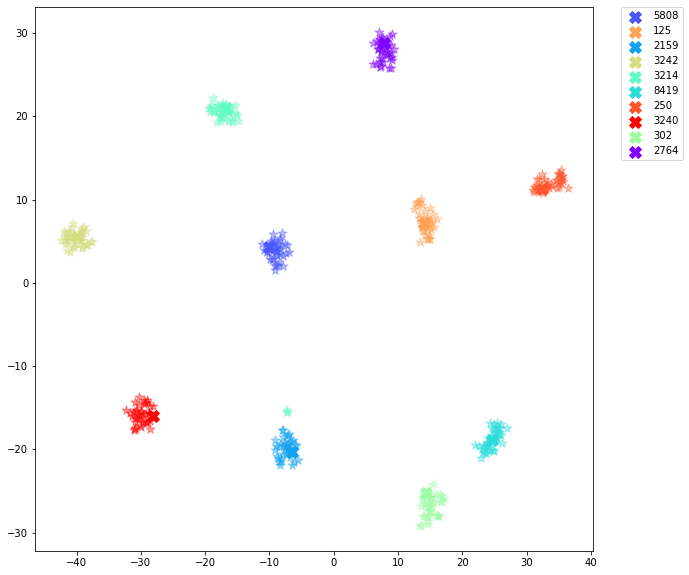

In [14]:
fig, ax = plt.subplots(figsize=(10,10))
for i in range(tsne_out.shape[0]):
    
    x_c = tsne_out[i, 0]
    y_c = tsne_out[i, 1]
    lb = Y[i]   # retrive the label
    
    # First N vetors are embedding
    if i < N:
        ax.scatter(x_c, y_c, marker='X', s=140, color=colors[lb], label=lb,
                   alpha=1.0)
    else:
        ax.scatter(x_c, y_c, marker='*',s=90, color=colors[lb], alpha=.4)
    
    
    
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [15]:
import seaborn as sns

<AxesSubplot:xlabel='dim_1', ylabel='dim_2'>

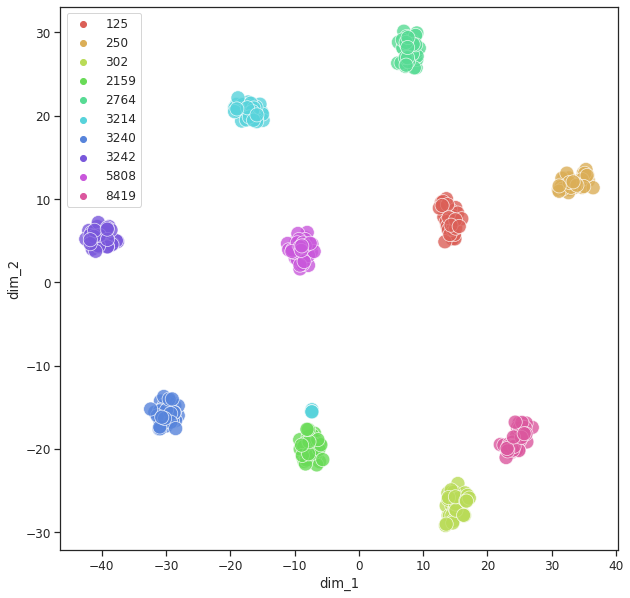

In [16]:
data = pd.DataFrame(tsne_out, columns=['dim_1', 'dim_2'])


fig = plt.figure(figsize=(10, 10))

sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
sns.scatterplot(
    x='dim_1',
    y='dim_2',
    hue=Y,
    palette=sns.color_palette("hls", len(np.unique(Y))),
    data=data,
    legend="brief",
    s=200,
    alpha=.8
)